# Logistic Regression

Sources:  
  
https://www.stat.purdue.edu/~zhanghao/MAS/handout/Likelihood.pdf  
https://www.kdnuggets.com/2022/11/comparing-linear-logistic-regression.html  
https://math.unm.edu/~schrader/biostat/bio1/notes/lecture15.pdf  
https://online.stat.psu.edu/stat501/lesson/13/13.2  
https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/  
https://www.geeksforgeeks.org/data-science/likelihood-function/  
https://medium.com/@robdelacruz/logistic-regression-from-scratch-7db690fb380b  
https://medium.com/@nicolasanti_43152/ml-loss-and-likelihood-e0a5ff4ae594  

For binary data $y\in\{0, 1\}$ with $p=P(y=1)$ and $1-p=P(y=0)$, the probability mass function (pmf) is:

$$
P(y; p) = 
\left\{
\begin{array}{ll}
p^y(1-p)^{1-y} & y \in {0,1} \\
0 & y \notin {0,1} 
\end{array}
\right.
$$
This is commonly reffered to as a "Bernoulli Distribution".

Given m predictors and n samples, we can arrange our predictors into an (m+1) x n matrix $X$. For cleanliness, let's make the first column vecor of $X$, $x_0$, filled with $1$s to be used with the intercept parameter.

$$
X = 
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1m} \\
1 & x_{21} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \cdots \\
1 & x_{n1} & \cdots & x_{nm}
\end{pmatrix}
$$

Each row vector, $x_i$, represents the feature values corresponding to the i'th observation, and each column vector, $x_j$, contains the predictor values for a single feature across all n samples.


In logistic regression, we want to optimize the weights in a linear combination corresponding to each feature. For each sample,

$$
z_i = x_i^\top \Theta = \sum_{j=0}^m x_{ij}\theta_j = \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} + ... + \theta_m x_{im}
$$

To provide a probability $(0 \lt p_i \lt 1)$, we want a way to compress the above values in the linear combination into the interval $(0,1)$. We can do so using the sigmoid function:

$$
p_i = \sigma(z_i) = \frac{1}{1+e^{-z_i}} = \frac{1}{1+e^{-x_i^\top\Theta}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

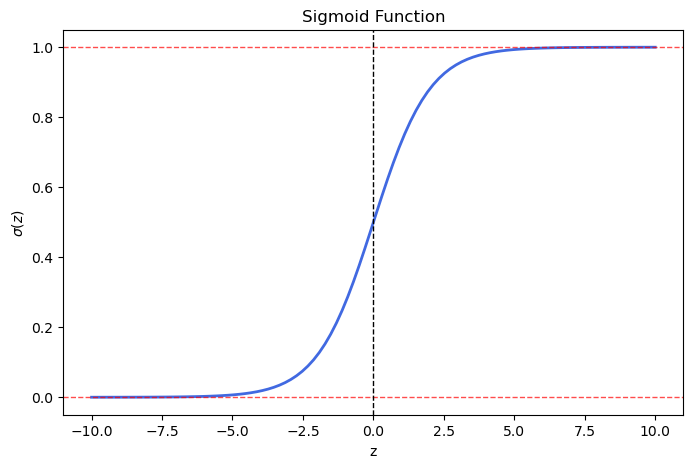

In [2]:
### Plotting sigma(z)

# Creating data
z = np.linspace(-10, 10, 100)
sigma = 1 / (1 + np.exp(-z))

# Plotting
plt.figure(figsize=(8,5))
plt.plot(z, sigma, linewidth=2, color='royalblue')
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.title("Sigmoid Function")
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(1, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

Thus the odds are:

$$
\frac{P(y=1)}{P(y=0)} = \frac{p_i}{1-p_i} = \frac{\sigma(z)}{1 - \sigma(z)} = \frac{1}{1+e^{-z_i}} \cdot \left(1 - \frac{1}{1+e^{-z_i}}\right)^{-1}
$$

$$
\frac{1}{1+e^{-z_i}} \cdot \frac{1}{1 - \frac{1}{1+e^{-z_i}}} = \frac{1}{1+e^{-z_i}} \cdot \frac{1+e^{-z_i}}{1+e^{-z_i}-1} = \frac{1}{1+e^{-z_i}} \cdot \frac{1+e^{-z_i}}{e^{-z_i}}
$$

$$
= \frac{1}{e^{-z_i}} = e^{z_i} = \boxed{e^{x_i^\top\Theta}}
$$

And thus the log odds:

$$
\log(\frac{p_i}{1-p_i}) = \log (e^{x_i^\top\Theta}) = \sum_{j=0}^m x_{ij} \theta_j = \boxed{x_i^\top \Theta}
$$

For intuition, note that

$$
\lim_{p\xrightarrow{}1}\log(\frac{p}{1-p})=+\infty
$$

and 

$$
\lim_{p\xrightarrow{}0}\log(\frac{p}{1-p})=-\infty
$$

so simply put, when $x_i^\top\Theta$ is large, it indicates a high probability that $y=1$, and when very negative, a high probability that $y=0$.

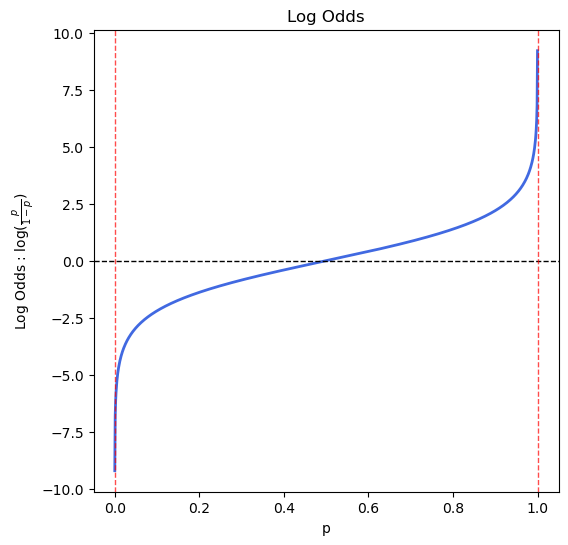

In [3]:
### Plotting log odds

# Creating data
p = np.linspace(0.0001, 0.9999, 1000)
logOdds = np.log(p / (1-p))

# Plotting
plt.figure(figsize=(6,6))
plt.plot(p, logOdds, linewidth=2, color='royalblue')
plt.xlabel("p")
plt.ylabel(r"Log Odds : $\log(\frac{p}{1-p})$")
plt.title("Log Odds")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.axvline(1, color='red', linestyle='--', linewidth=1, alpha=0.7)

Now, let's introduce something called the "Likelihood Function".
It is defined generally as the likelihood of the parameters given the data.

$$
L(\Theta | \text{data}) = P(\text{data} | \Theta)
$$

Generally, the likelihood function can be represented as

$$
L(\Theta | X) = \prod_{i=1}^n f(x_i ; \Theta)
$$

where $f(x_i ; \Theta)$ is the probability density function (pdf) or mass function (pmf) for a given sample $x_i$.  


So, the likelihood for a binary logistic classification given n samples follows the below:

$$
L(\Theta | X) = \prod_{i=1}^n p_i^{y_i}(1-p_i)^{1-y_i} = \prod_{i=1}^n \left(\frac{e^{x_i^\top\Theta}}{1 + e^{x_i^\top\Theta}}\right)^{y_i}\left(\frac{1}{1 + e^{x_i^\top\Theta}}\right)^{1-y_i}
$$


And thus the Log-Likelihood:

$$
\log L(\Theta | X) = \log \left(\prod_{i=1}^n p_i^{y_i}(1-p_i)^{1-y_i}\right) = \sum_{i=1}^n \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i)\right]
$$

$$
= \sum_{i=1}^n \left[ y_i \log(p_i) + \log(1-p_i) - y_i\log(1-p_i)\right] = \sum_{i=1}^n \left[ y_i (\log(p_i) - \log(1-p_i))+ \log(1-p_i) \right]
$$

$$
= \sum_{i=1}^n \left[ y_i\log(\frac{p_i}{1-p_i}) + \log(1-p_i) \right] = \sum_{i=1}^n \left[ y_i\log(e^{x_i^{\top}\Theta}) + \log\left(1-\frac{e^{x_i^\top\Theta}}{1 + e^{x_i^\top\Theta}}\right) \right]
$$

$$
\boxed{= \sum_{i=1}^n \left[ y_ix_i^{\top}\Theta - \log(1 + e^{x_i^\top\Theta}) \right]}
$$

So the goal becomes to find a maximum of the Log-Likelihood function, and thus determine the values of $\Theta$ that maximize the probability of the observed data. To do so, we are going to use gradient descent. I'm going to gloss over what gradient descent is here, but in short, is a method used to iteratively identify minima of a function. For a more in depth explaination of gradient descent, you can refer to this notebook in the repo:  
https://github.com/JakeLarimer/MLAlgosFromScratch/blob/main/LinearRegressionWithGradientDescent.ipynb.  
  
Since its more formal with gradient descent to identify minima rather than maxima, I'm going to put a negative in front of our Log-Likelihood function to turn it into a cost function $J$. That said, this is just for standardization and we could use a near identical method to identify a maxima. We want to take the partial derivative with repect to each parameter. So for a single parameter $\theta_j$:

$$
\frac{\partial J}{\partial \theta_j} = \frac{\partial}{\partial \theta_j} \bigg[-\log L(\Theta | X)\bigg] = -\frac{\partial}{\partial \theta_j} \sum_{i=1}^n \left[ y_ix_i^{\top}\Theta - \log(1 + e^{x_i^\top\Theta}) \right] = -\frac{\partial}{\partial \theta_j} \sum_{i=1}^n \left[ y_ix_i^{\top}\Theta \right] + \frac{\partial}{\partial \theta_j} \sum_{i=1}^n \left[\log(1 + e^{x_i^\top\Theta}) \right]
$$

Let's break this up into two. First,

$$
-\frac{\partial}{\partial \theta_j} \sum_{i=1}^n \left[ y_ix_i^{\top}\Theta \right]
$$

For one term in the summation,

$$
-\frac{\partial}{\partial \theta_j} \left[ y_ix_i^{\top}\Theta \right] = -\frac{\partial}{\partial \theta_j} y_i\left[ \theta_0 + x_{i1}\theta_1 +  ...  + x_{ij}\theta_j + ... + x_{im}\theta_m \right] = -y_i x_{ij}
$$

Bringing back the sum over all samples,

$$
-\frac{\partial}{\partial \theta_j} \sum_{i=1}^n \left[ y_ix_i^{\top}\Theta \right] = -\sum_{i=1}^n y_i x_{ij}
$$

Now for the second term,

$$
\frac{\partial}{\partial \theta_j} \sum_{i=1}^n \left[\log(1 + e^{x_i^\top\Theta}) \right]
$$

Again for one term in the summation, 

$$
\frac{\partial}{\partial \theta_j} \left[\log(1 + e^{x_i^\top\Theta}) \right] = \frac{1}{1 + e^{x_i^\top\Theta}} \cdot x_{ij} e^{x_i^\top\Theta} = x_{ij} \cdot \frac{e^{x_i^\top\Theta}}{1 + e^{x_i^\top\Theta}} = x_{ij} \sigma(x_i^\top\Theta)
$$

And bringing back the sum over all samples,

$$
\frac{\partial}{\partial \theta_j} \sum_{i=1}^n \left[\log(1 + e^{x_i^\top\Theta}) \right] = \sum_{i=1}^n x_{ij} \sigma(x_i^\top\Theta)
$$

Finally combining both terms together, we get,

$$
\frac{\partial}{\partial \theta_j} \bigg[-\log L(\Theta | X)\bigg] = -\sum_{i=1}^n y_i x_{ij} + \sum_{i=1}^n x_{ij} \sigma(x_i^\top\Theta) = \sum_{i=1}^n x_{ij} \big[ \sigma(x_i^\top\Theta) - y_i \big]
$$

$$
\boxed{\frac{\partial J}{\partial\theta_j} = \sum_{i=1}^n x_{ij} \left[ \frac{1}{1+e^{-x_i^\top\Theta}} - y_i\right]
= \sum_{i=1}^n x_{ij} \left[ \sigma (z_i) - y_i\right]}
$$

It's possible to compact this notation a little more:

$$
\frac{\partial J}{\partial\theta_j} = X_j^{\top} \left[ \sigma (X \Theta) - y\right]
$$

We want to express this generally, as the gradient of $J$ over all $\theta_j$.

$$
\nabla_\Theta J = 
\begin{bmatrix}
\frac{\partial J}{\partial \theta_0} \\
\vdots \\
\frac{\partial J}{\partial \theta_j} \\
\vdots \\ 
\frac{\partial J}{\partial \theta_m}
\end{bmatrix}
= \boxed{X^{\top} \left[ \sigma (X \Theta) - y\right]}
$$

To train our logistic regression algorithm, we are going to minimize the loss function using gradient descent:

$$
\Theta^{(t)} = \Theta^{(t-1)} - \eta \nabla_{\Theta} J(\Theta^{(t-1)})
$$

In [4]:
# Defining logistic regression class
class LogReg:
    # Constructor
    def __init__(self):
        self.__theta = None

    
    # Returns parameters
    def getParams(self):
        return self.__theta

    # Finds J (cost function), given 

    
    # Finds the gradient of J, given x, y, theta, as parameters
    def findGradJ(self, x, y, theta):

        # If only one predictor, making x column vector
        if x.ndim == 1:
            x = x.reshape(-1, 1)
        
        # Making y column vector
        y = y.reshape(-1, 1)
        
        # Adding a column of 1s to our predictor matrix for intercept
        X = np.hstack((np.ones((x.shape[0], 1)), x))

        # Calculating z, sigma
        z = X @ theta
        
        sigma = 1 / (1 + np.exp(-z))
        #sigma = np.array(sigma)
        sigma = sigma.reshape(-1, 1)

        #print("sigma shape : ", sigma.shape, sigma.size)
        #print("X shape : ", X.T.shape, X.size)
        #print("y shape : ", y.shape, y.size)
        
        # Calculating gradient of J for all predictors
        #print(X.T)
        #print(sigma)
        #print(y)
        #print(sigma - y)
        gradJ = (X.T @ (sigma - y)).ravel()  # flatten to 1D

        return gradJ

    
    # Trains model given x matrix, y array, eta (learning rate) parameters
    def train(self, x, y, eta=0.01, threshold=0.01):
        
        # Ensuring x, y are numpy arrays
        x = np.array(x)
        y = np.array(y)

        # If only one predictor, making x column vector
        if x.ndim == 1:
            x = x.reshape(-1, 1)

        # Making y column vector
        y = y.reshape(-1, 1)
            
        # Initializing theta array, with size number of parameters + 1 (for intercept)
        theta = np.zeros(x.shape[1] + 1)

        # Finding gradient of J
        curGradJ = self.findGradJ(x, y, theta)

        maxIters = 10000
        t = 0
        
        # Iterating until minima found, or maximum iterations reached
        while np.linalg.norm(curGradJ) > eta and t < maxIters:
            # print(theta.shape)
            # print(curGradJ.shape)
            # Updating parameters
            theta -= eta * curGradJ
            curGradJ = self.findGradJ(x, y, theta)
            t += 1

        # Updating parameters
        self.__theta = theta

    
    # Predict y values given x
    def predict(self, x):
        # Checking if model has been trained        
        if self.__theta is None:
            print("Model needs to be trained - cannot predict")

        else:
            x = np.array(x)
            # x needs to be 2d
            if x.ndim == 1:
                x = x.reshape(-1, 1)

            # Adding a column of 1s to our predictor matrix for intercept
            X = np.hstack((np.ones((x.shape[0], 1)), x))
            
            z = X @ self.__theta
            
            # Finding probabilities of y=1 for each sample
            pPred = 1 / (1 + np.exp(-z))

            # Finding predicted y, {0, 1}
            yPred = np.round(pPred).astype(int)

            # Returns tupple of y predictions, and their probabilities
            return (yPred, pPred)
        

Params :  [-9.22888208  1.93603397]


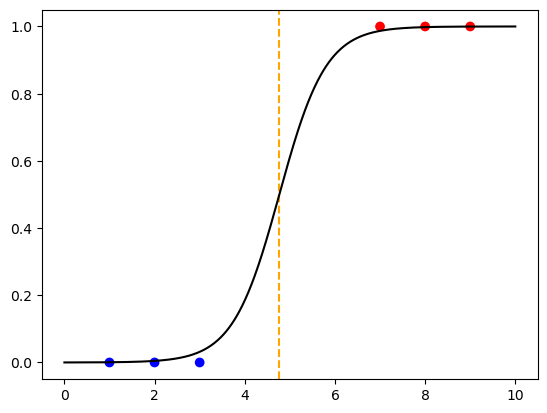

In [7]:
xTrain = np.array([1,2,3,7,8,9])
yTrain = np.array([0,0,0,1,1,1])
xTest = np.linspace(0, 10, 1000)

LogRegModel1 = LogReg()
LogRegModel1.train(xTrain, yTrain)
print("Params : ", LogRegModel1.getParams())
predictions = LogRegModel1.predict(xTest)

cmap = []
for val in yTrain: 
    if val==0:
        cmap.append('blue')
    else:
        cmap.append('red')
    
for i in range(len(predictions[0]) - 1):
    if predictions[0][i] != predictions[0][i+1]:
        des_bound_1 = (xTest[i] + xTest[i+1]) / 2
        break

plt.scatter(xTrain, yTrain, c=cmap)
#plt.plot(xTest, predictions[0], linestyle = '--', color='orange')
plt.axvline(des_bound_1, linestyle = '--', color='orange')
plt.plot(xTest, predictions[1], color = 'black')

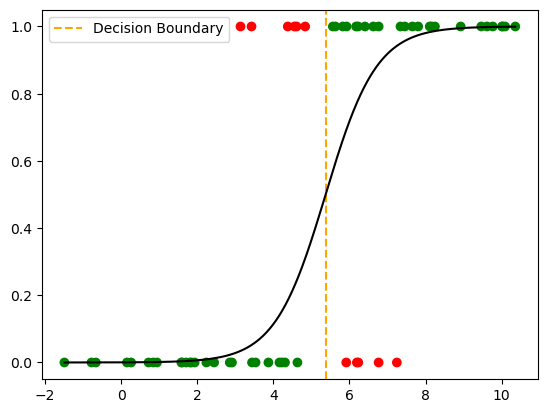

In [12]:
noise0 = np.random.normal(2, 2, size=100)
noise1 = np.random.normal(7, 2, size=100)
y0 = np.zeros(100)
y1 = np.ones(100)
xTrain2 = np.concatenate((noise0, noise1))
yTrain2 = np.concatenate((y0, y1))

noise0Test = np.random.normal(2, 2, size=30)
noise1Test = np.random.normal(7, 2, size=30)
y0Test = np.zeros(30)
y1Test = np.ones(30)
xTest2 = np.concatenate((noise0Test, noise1Test))
yTest2 = np.concatenate((y0Test, y1Test))
xTest2_Space = np.linspace(np.min(xTest2), np.max(xTest2), 1000)


# Shuffling our x and y values for training and testing (not needed)
shufflePoints = list(zip(xTrain2, yTrain2))
np.random.shuffle(shufflePoints)
xTrain2, yTrain2 = zip(*shufflePoints)

shufflePointsTest = list(zip(xTest2, yTest2))
np.random.shuffle(shufflePointsTest)
xTest2, yTest2 = zip(*shufflePointsTest)

LogRegMod2 = LogReg()
LogRegMod2.train(xTrain2, yTrain2)
preds2 = LogRegMod2.predict(xTest2)
preds2_Space = LogRegMod2.predict(xTest2_Space)

# Output of predict is [[Predictions], [Probability]]
#print(preds2_Space)
for i in range(len(preds2_Space[0]) - 1):
    #preds2_Space[0][i]
    if preds2_Space[0][i] != preds2_Space[0][i+1]:
        des_bound_2 = (xTest2_Space[i] + xTest2_Space[i+1]) / 2
        break

cmap2 = []
for i in range(len(yTest2)):
    if yTest2[i] == preds2[0][i]:
        cmap2.append('green')
    else:
        cmap2.append('red')

plt.scatter(xTest2, yTest2, c=cmap2)#, label="Test Points")
#plt.plot(xTest2_Space, preds2_Space[0], linestyle = '--', color='orange')
plt.axvline(des_bound_2, linestyle = '--', color='orange', label="Decision Boundary")
plt.plot(xTest2_Space, preds2_Space[1], color='black')
plt.legend()
